# <span style="color:white">By Naives Bayes</span>

In [18]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [5]:
sms_df = pd.read_csv('/Users/risharane/Downloads/spamSMS.csv')

In [6]:
sms_df

,sms,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...\n,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1
5570,Will ü b going to esplanade fr home?\n,0
5571,"Pity, * was in mood for that. So...any other s...",0
5572,The guy did some bitching but I acted like i'd...,0


In [28]:
sms_df.label.value_counts()

label
0    4827
1     747
Name: count, dtype: int64

In [7]:
sms_df['sms'][5572]

"The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free\n"

## **Data processing**

In [8]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [ ]:
# Stemming

from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stemming(text):
    stem = [stemmer.stem(token) for token in doc]
    return ' '.join(stem)

In [9]:
# LEMMATIZATION

def lemmatization(text):
  doc = nlp(text)
  lemma = [token.lemma_ for token in doc]
  return ' '.join(lemma)

sms_df['lemma'] = sms_df['sms'].apply(lemmatization)

In [10]:
sms_df

,sms,label,lemma
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl..."
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah I do not think he go to usf , he live arou..."
...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this be the 2nd time we have try 2 contact u. ...
5570,Will ü b going to esplanade fr home?\n,0,will ü b go to esplanade fr home ? \n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * be in mood for that . so ... any othe..."
5572,The guy did some bitching but I acted like i'd...,0,the guy do some bitching but I act like I woul...


In [11]:
sms_df['lemma'][5572]

'the guy do some bitching but I act like I would be interested in buy something else next week and he give it to we for free \n'

In [12]:
# REMOVE THE STOPWORDS

def remove_stopwords(text):
  doc = nlp(text)
  no_stop_words = [token.text for token in doc if not token.is_stop and not token.is_punct]
  return ' '.join(no_stop_words)

sms_df['preprocessed'] = sms_df['lemma'].apply(remove_stopwords)

In [13]:
sms_df

,sms,label,lemma,preprocessed
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl...",jurong point crazy available bugis n great wor...
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n,ok lar joke wif u oni \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...,u dun early hor u c \n
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah I do not think he go to usf , he live arou...",nah think usf live \n
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this be the 2nd time we have try 2 contact u. ...,2nd time try 2 contact u. U win £ 750 Pound pr...
5570,Will ü b going to esplanade fr home?\n,0,will ü b go to esplanade fr home ? \n,ü b esplanade fr home \n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * be in mood for that . so ... any othe...",pity mood suggestion \n
5572,The guy did some bitching but I acted like i'd...,0,the guy do some bitching but I act like I woul...,guy bitching act like interested buy week free \n


In [14]:
sms_df['preprocessed'][5572]

'guy bitching act like interested buy week free \n'

## **Generate Training Testing**

In [15]:
from sklearn.model_selection import train_test_split

input = sms_df['preprocessed']
target = sms_df['label']

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 42)

In [16]:
X_train.shape, y_train.shape

((4459,), (4459,))

In [ ]:
X_test.shape, y_test.shape

# **Vectorization & Model Training**

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

classifier = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

classifier.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer(ngram_range=(1, 2))),
                ('Multi NB', MultinomialNB())])

In [20]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [21]:
y_test

3690    0
3527    0
724     0
3370    0
468     0
       ..
2942    0
4864    1
3227    0
3796    0
2879    1
Name: label, Length: 1115, dtype: int64

In [22]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

## **Model Accuracy checking**

In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       954
           1       0.97      0.93      0.95       161

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [24]:
from sklearn.metrics import accuracy_score

print(f'Model Accuracy : {accuracy_score(y_test, y_pred) * 100} %')

Model Accuracy : 98.56502242152466 %


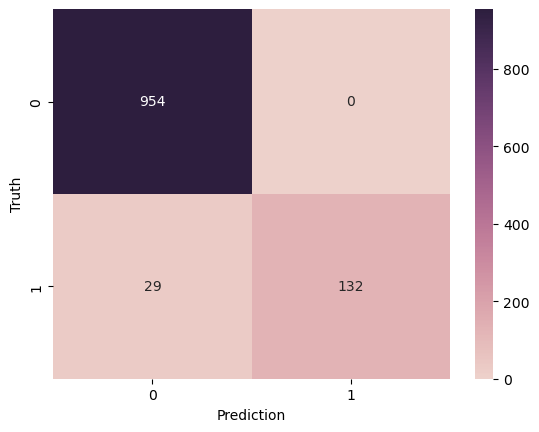

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot = True, fmt = 'd', cmap=sns.cubehelix_palette(as_cmap=True));
plt.xlabel('Prediction');
plt.ylabel('Truth');

# <span style="color:indigo">By Random Forest Classifier</span>

In [29]:
sms_df

,sms,label,lemma,preprocessed
0,"Go until jurong point, crazy.. Available only ...",0,"go until jurong point , crazy .. available onl...",jurong point crazy available bugis n great wor...
1,Ok lar... Joking wif u oni...\n,0,ok lar ... joke wif u oni ... \n,ok lar joke wif u oni \n
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win FA Cup final tkts 2...
3,U dun say so early hor... U c already then say...,0,u dun say so early hor ... u c already then sa...,u dun early hor u c \n
4,"Nah I don't think he goes to usf, he lives aro...",0,"nah I do not think he go to usf , he live arou...",nah think usf live \n
...,...,...,...,...
5569,This is the 2nd time we have tried 2 contact u...,1,this be the 2nd time we have try 2 contact u. ...,2nd time try 2 contact u. U win £ 750 Pound pr...
5570,Will ü b going to esplanade fr home?\n,0,will ü b go to esplanade fr home ? \n,ü b esplanade fr home \n
5571,"Pity, * was in mood for that. So...any other s...",0,"pity , * be in mood for that . so ... any othe...",pity mood suggestion \n
5572,The guy did some bitching but I acted like i'd...,0,the guy do some bitching but I act like I woul...,guy bitching act like interested buy week free \n


## Vectorization

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

In [31]:
v.fit(sms_df['preprocessed'])

CountVectorizer()

In [32]:
bow = v.transform(sms_df['preprocessed'])
bow

<5574x7610 sparse matrix of type '<class 'numpy.int64'>'
	with 40954 stored elements in Compressed Sparse Row format>

## Generate Training Testing Set

In [33]:
from sklearn.model_selection import train_test_split

input = bow
target = sms_df['label']

X_train, X_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 42)

In [34]:
X_train.shape, X_test.shape

((4459, 7610), (1115, 7610))

## Model Training & Hyperparameter Tuning

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

model = RandomForestClassifier(n_jobs=1, 
                               random_state = 42,
                               max_features = 15,
                               bootstrap = False,
                               class_weight = {0:1, 1:2})

In [36]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight={0: 1, 1: 2},
                       max_features=15, n_jobs=1, random_state=42)

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [38]:
m0 = model.estimators_[0]
m50 = model.estimators_[50]

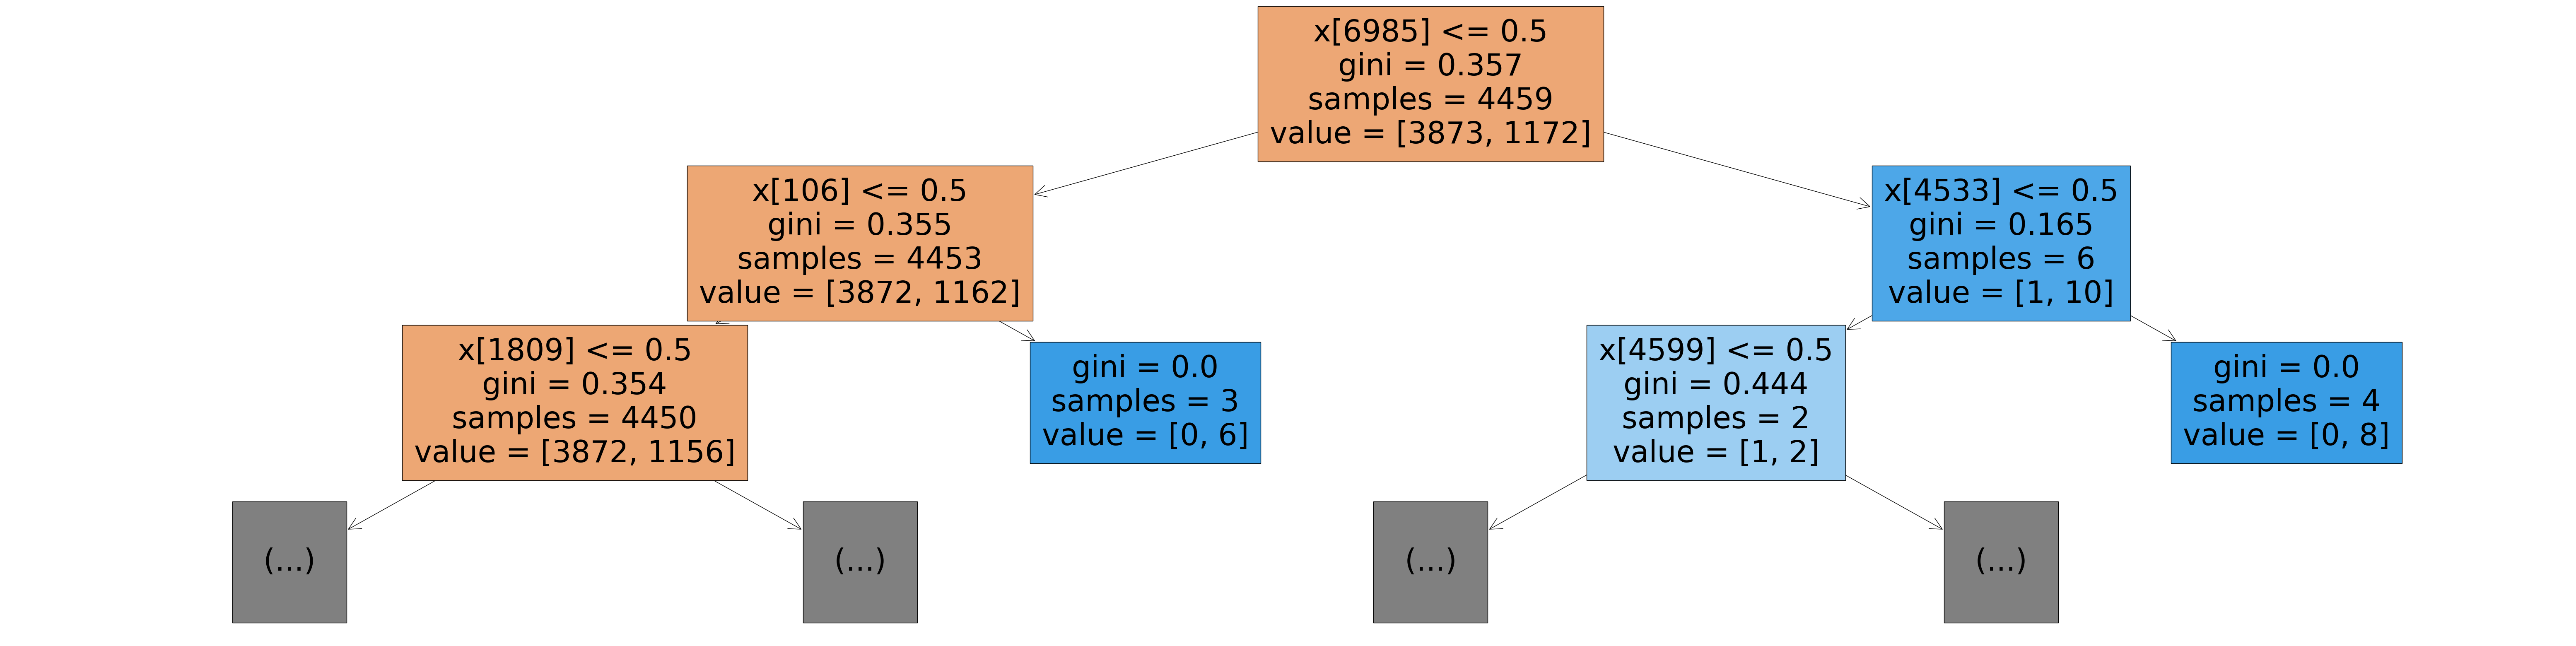

In [42]:
# VISUALIZING 0th TREE
import matplotlib.pyplot as plt
plt.figure(figsize=(80,20))
plot_tree(m0, max_depth = 2, filled = True);

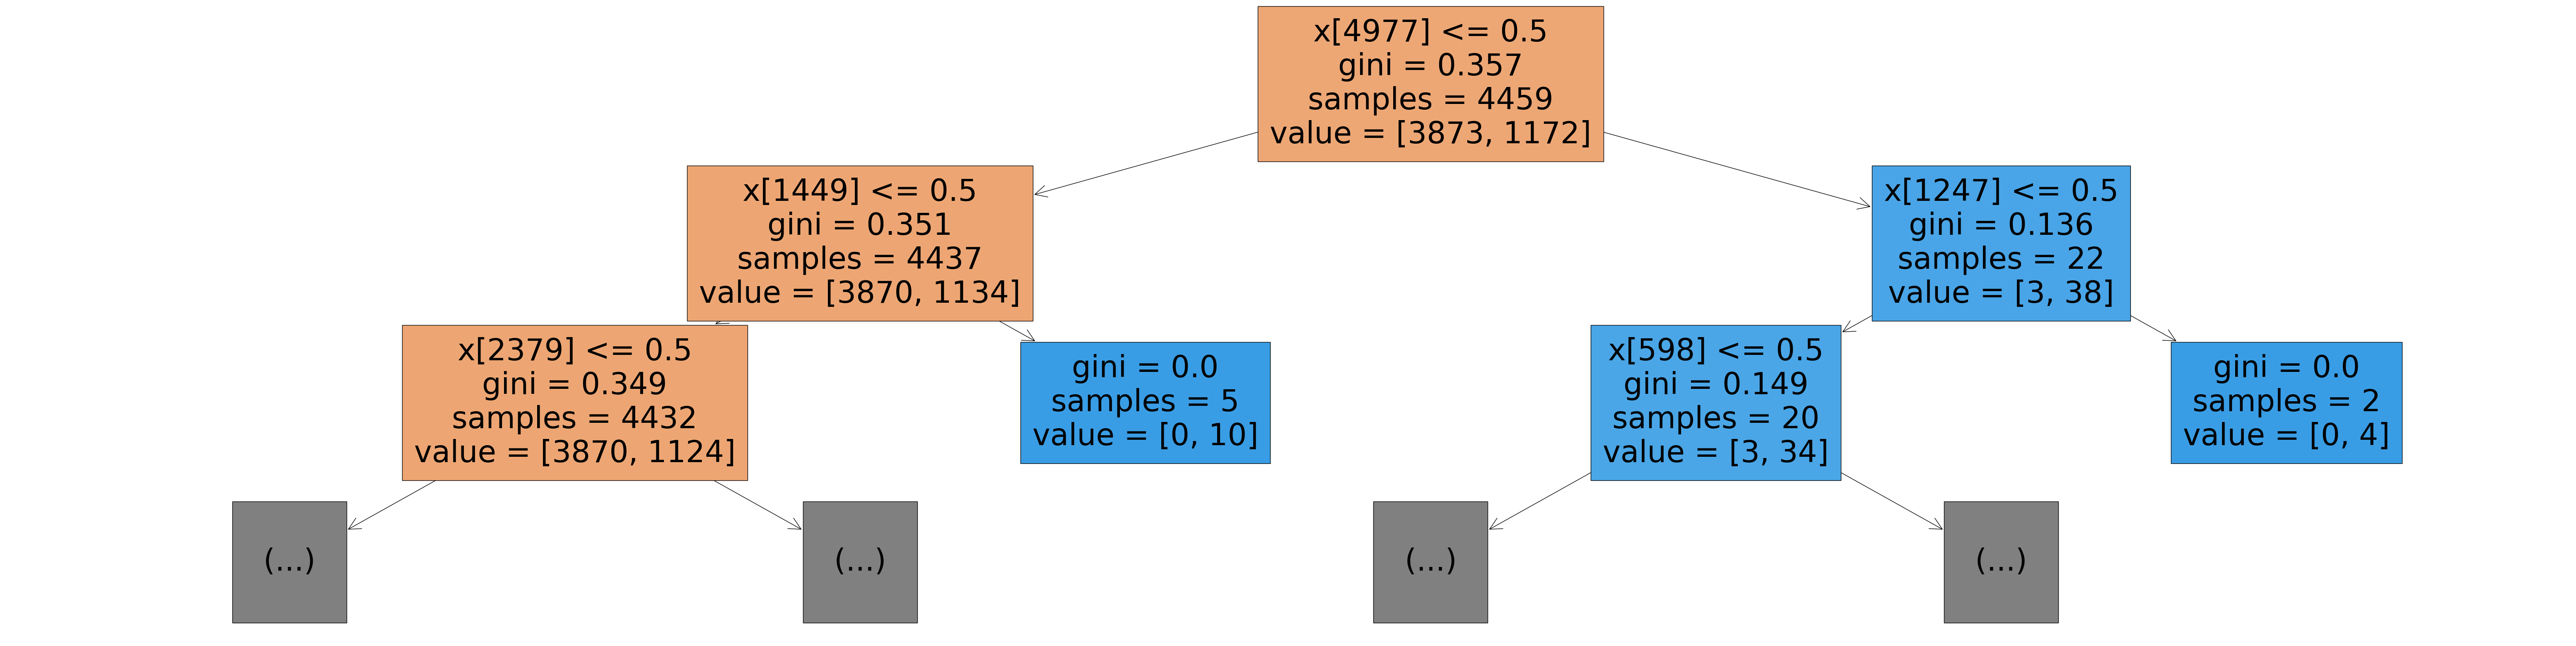

In [40]:
# VISUALIZING 50th TREE
plt.figure(figsize=(80,20))
plot_tree(m50, max_depth = 2, filled = True);

## Model Accuracy checking

In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       954
           1       1.00      0.82      0.90       161

    accuracy                           0.97      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [44]:
from sklearn.metrics import accuracy_score

print(f'Model Accuracy : {accuracy_score(y_test, y_pred) * 100} %')

Model Accuracy : 97.39910313901345 %


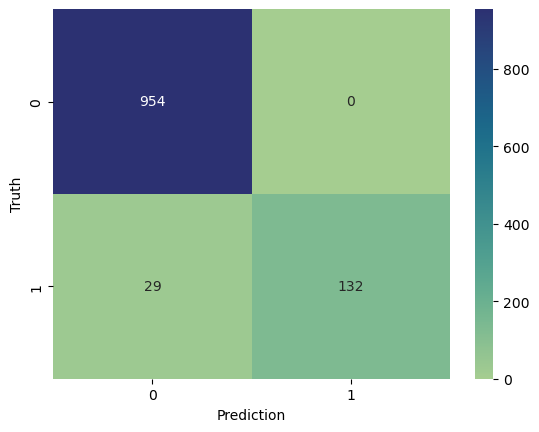

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cf = confusion_matrix(y_test, y_pred)

sns.heatmap(cf, annot = True, fmt = 'd',  cmap="crest");
plt.xlabel('Prediction');
plt.ylabel('Truth');